In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Task 1.1 - Correction Step in Bayes Filter

### Sensor Model $P(z_t|x_t)$

In [2]:
# Create an empty dataframe with columns 'Z', 'X1' to 'X7'
columns = ['Z'] + [f'X{i}' for i in range(1, 8)]
df = pd.DataFrame(columns=columns)
df['X1'] = [0.0, 0.0, 0.0, 1.0]
df['X2'] = [0.0, 0.25, 0.50, 0.25]
df['X3'] = [0.25, 0.50, 0.25, 0.0]
df['X4'] = [0.50, 0.25, 0.0, 0.25]
df['X5'] = [0.0, 0.50, 0.50, 0.0]
df['X6'] = [0.50, 0.50, 0.0, 0.0]
df['X7'] = [0.0, 0.0, 0.0, 1.0]

df['Z'] = [-1, 0, 1, 'n']

# Set column 'Z' as the index
df.set_index('Z', inplace=True)

In [3]:
df

,X1,X2,X3,X4,X5,X6,X7
Z,,,,,,,
-1,0.0,0.00,0.25,0.50,0.0,0.5,0.0
0,0.0,0.25,0.50,0.25,0.5,0.5,0.0
1,0.0,0.50,0.25,0.00,0.5,0.0,0.0
n,1.0,0.25,0.00,0.25,0.0,0.0,1.0


### Prior $\overline{bel}(x_t)$

In [4]:
prior = np.array([0.1, 0.3, 0.2, 0.2, 0.2, 0.0, 0.0])

Text(0.5, 1.0, 'Prior distribution over states')

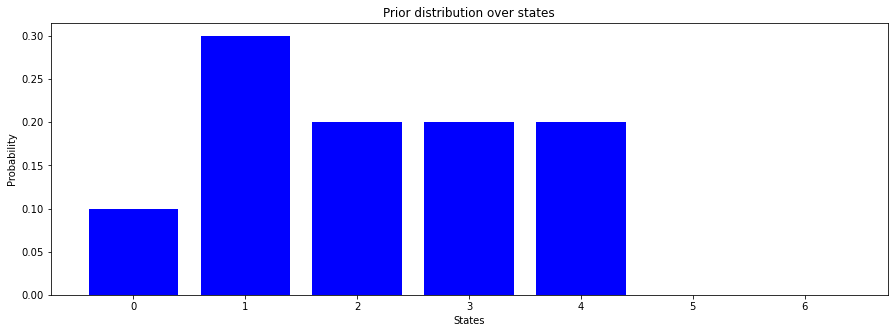

In [5]:
# Create a bar plot

plt.figure(figsize=(15,5))
plt.bar(range(len(prior)), prior, color='blue')

# Add labels and title
plt.xlabel('States')
plt.ylabel('Probability')
plt.title('Prior distribution over states')

### Posterior $bel(x_t)$ if measurement is $z=1$

Using prediction step in Bayes Rule, we can compute posterior distribution over states.

$bel(x_t)$ = $P(z_t=1|x_t)$ $\cdot$ $\overline{bel}(x_t)$

In [6]:
posterior = np.zeros(len(prior))

In [7]:
z = 1
posterior[0] = df.loc[z,'X1'] * prior[0]
posterior[1] = df.loc[z,'X2'] * prior[1]
posterior[2] = df.loc[z,'X3'] * prior[2]
posterior[3] = df.loc[z,'X4'] * prior[3]
posterior[4] = df.loc[z,'X5'] * prior[4]
posterior[5] = df.loc[z,'X6'] * prior[5]
posterior[6] = df.loc[z,'X7'] * prior[6]

In [8]:
# Normalize so it sum up to one
normalization_constant = np.sum(posterior)
posterior = np.divide(posterior, normalization_constant)

Text(0.5, 1.0, 'Posterior distribution over states')

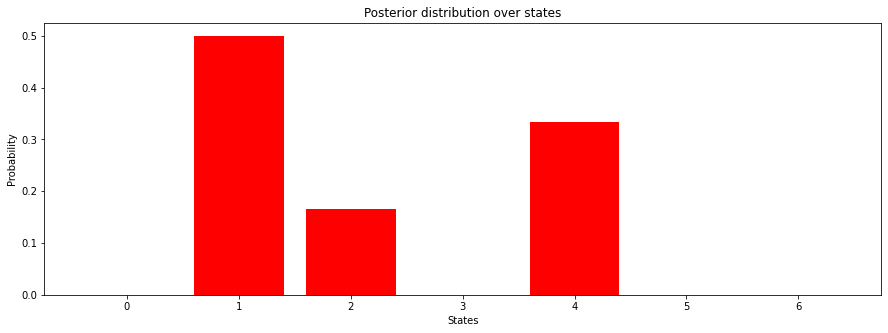

In [9]:
# Create a bar plot

plt.figure(figsize=(15,5))
plt.bar(range(len(posterior)), posterior, color='red')

# Add labels and title
plt.xlabel('States')
plt.ylabel('Probability')
plt.title('Posterior distribution over states')

## Task 1.2 - Prediction Step in Bayes Filter

### Motion Model $P(x_t | u_t,x_{t-1})$

In [10]:
p_stay = 0.2
p_move_right_1 = 0.6
p_move_right_2 = 0.2
p_move_left_1 = 0.0
p_move_left_2 = 0.0

# Define the motion model kernel
# We have to add move_left_1 and move_left_2, because p_stay needs to be center of kernel
motion_model = np.array([p_move_left_2, p_move_left_1, p_stay, p_move_right_1, p_move_right_2])

### Posterior calculation

### $\overline{bel}(x_t)$ = $\sum_{x_{t-1}} P(x_t | u_t, x_{t-1}) \cdot bel(x_{t-1})$

In [11]:
prior = posterior

In [12]:
posterior = np.convolve(prior, motion_model, mode='same')
# Normalization for valid probability distribution (sum up to 1)
# posterior /= np.sum(posterior)

Text(0.5, 1.0, 'Posterior distribution over states')

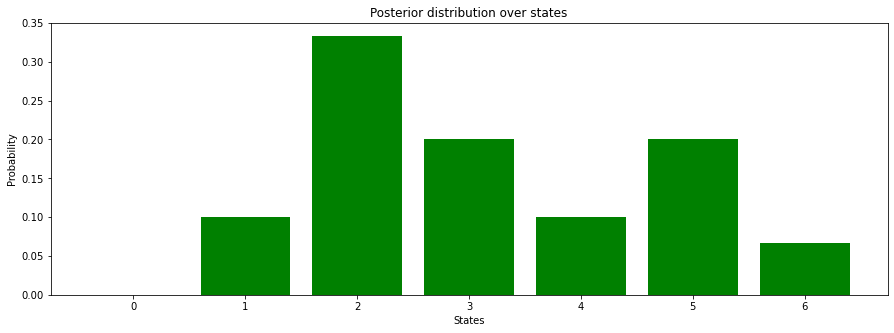

In [13]:
# Create a bar plot

plt.figure(figsize=(15,5))
plt.bar(range(len(posterior)), posterior, color='green')

# Add labels and title
plt.xlabel('States')
plt.ylabel('Probability')
plt.title('Posterior distribution over states')

## Task 2 - Bayes Filter

In [14]:
states = [0,10,20,30,40,50,60,70,80,90,100]
bel = np.array([0.0, 0.0, 0.0, 0.2, 0.6, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0])

In [15]:
def prediction(motion, bel, states):
    new_bel = np.convolve(bel, motion, mode='same')
    
    plt.figure(figsize=(15,5))
    plt.bar(states, new_bel, color='green')
    
    # Add labels and title
    plt.xlabel('States')
    plt.ylabel('Probability')
    plt.title('Prediction')
    return new_bel

In [16]:
def correction(m, bel, states):
    new_bel = np.zeros(len(bel))
    for i in range(len(states)):
        if(states[i] > (m + 10)):
            new_bel[i] = 0.0 * bel[i]
        if(states[i] == (m + 10)):
            new_bel[i] = 0.1 * bel[i]
        if(states[i] == m):
            new_bel[i] = 0.7 * bel[i]
        if(states[i] == (m - 10)):
            new_bel[i] = 0.2 * bel[i]
        if(states[i] < (m - 10)):
            new_bel[i] = 0.0 * bel[i]

    # Normalize
    new_bel = np.divide(new_bel, np.sum(new_bel))
    
    plt.figure(figsize=(15,5))
    plt.bar(states, new_bel, color='green')
    
    # Add labels and title
    plt.xlabel('States')
    plt.ylabel('Probability')
    plt.title('Correction')
    return new_bel

In [17]:
def bayes_filter(motion, m, bel, states):
    pred_bel = prediction(motion, bel, states)
    corr_bel = correction(m, pred_bel, states)
    return corr_bel

In [18]:
# action 0 is a=-10, action 1 is a=0, action 2 is a=10 (I encoded actions, because of easier indexing )
actions = [0,1,2]
motion_model = [[0.7, 0.3, 0.0],[0.0, 1.0, 0.0],[0.0, 0.2, 0.8]]
measurements = [40,50,50]

Text(0.5, 1.0, 'Prior distribution over the states')

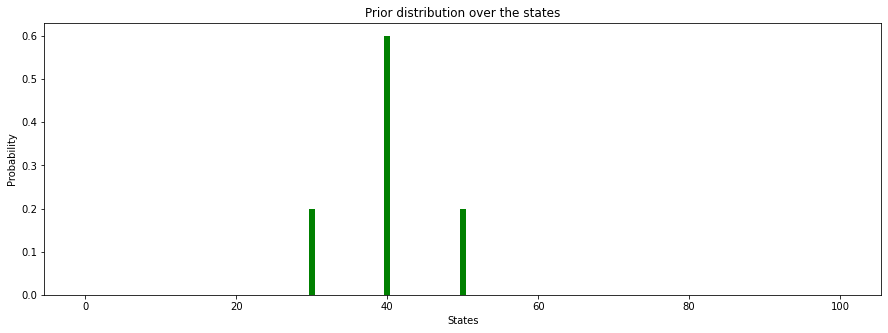

In [19]:
plt.figure(figsize=(15,5))
plt.bar(states, bel, color='green')
    
# Add labels and title
plt.xlabel('States')
plt.ylabel('Probability')
plt.title('Prior distribution over the states')

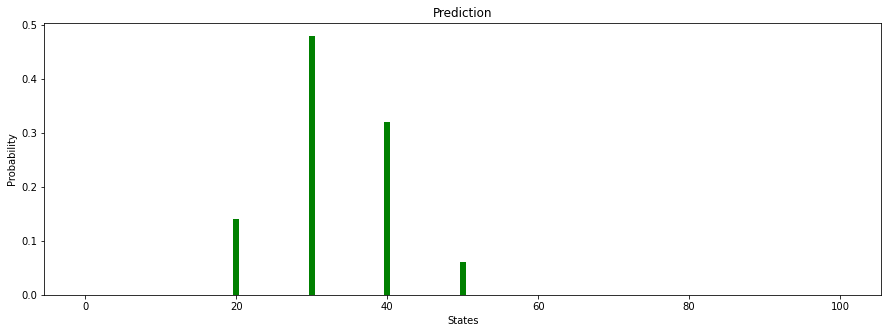

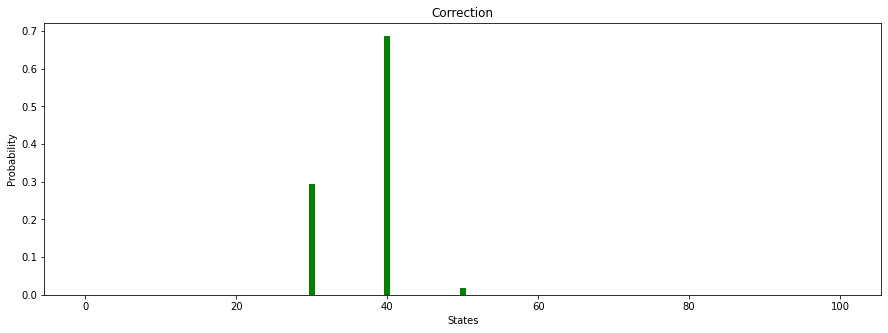

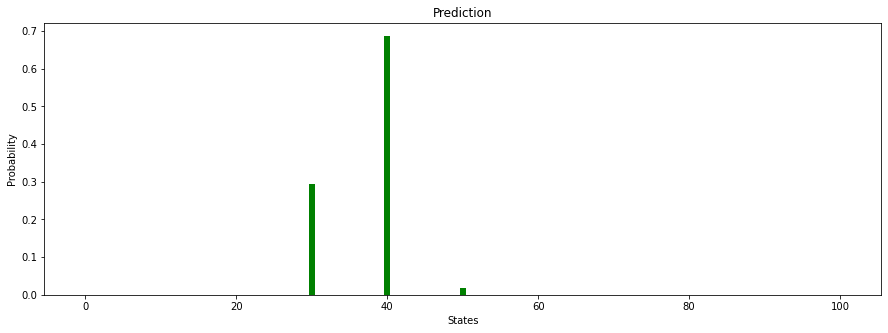

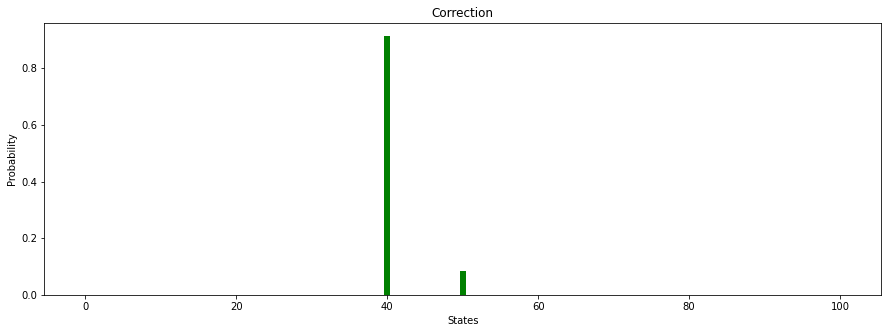

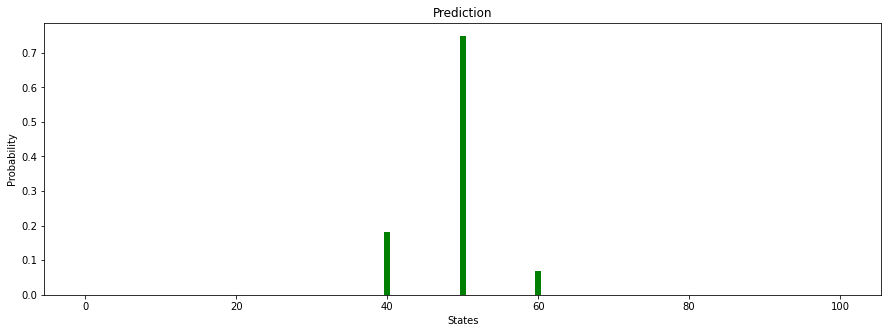

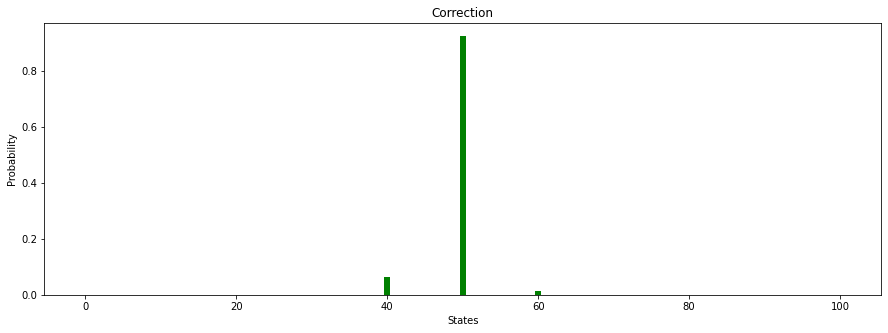

In [20]:
for i in range(len(actions)):
    prior = bel
    bel = bayes_filter(motion_model[actions[i]], measurements[i], prior, states)